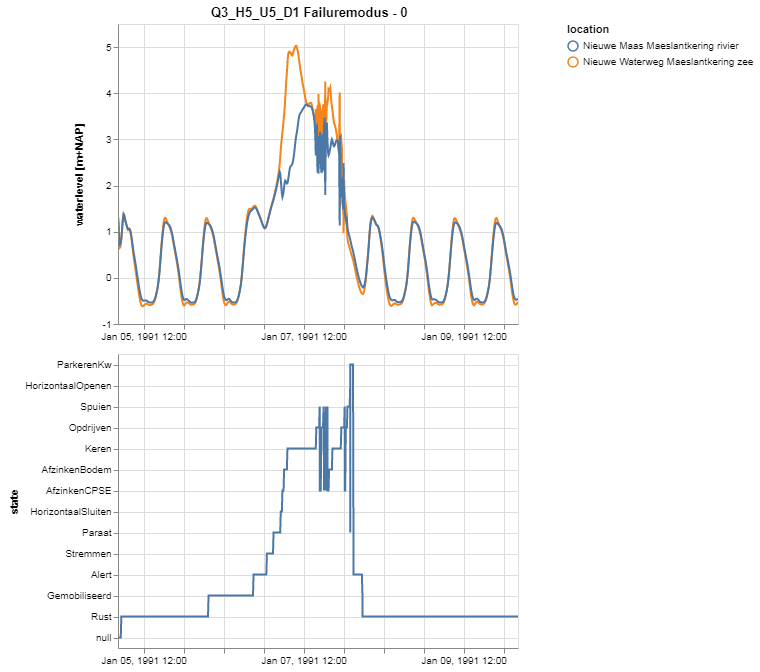

In [1]:
import altair as alt

# some data
df_url = 'https://raw.githubusercontent.com/mattijn/datasets/master/comb_chart_interactive.json'
states = ['ParkerenKw', 'HorizontaalOpenen', 'Spuien', 'Opdrijven', 'Keren', 'AfzinkenBodem', 'AfzinkenCPSE', 'HorizontaalSluiten', 'Paraat', 'Stremmen', 'Alert', 'Gemobiliseerd', 'Rust']

# charting
top = alt.Chart(df_url).mark_line().encode(
  x = alt.X('index:T', timeUnit = 'yearmonthdatehoursminutes', title = None),
  y = alt.Y('value:Q', title = 'waterlevel [m+NAP]'),
  color = alt.Color('location:N'),
  tooltip = ['state:O', 'comp1:O', 'comp2:O', alt.Tooltip('index:T', format = '%Y-%m-%d %H:%M')]
).properties(
  title = 'Q3_H5_U5_D1 Failuremodus - 0'
).interactive(bind_y = False)

bottom = alt.Chart(df_url).mark_line().encode(
  x = alt.X('index:T', timeUnit = 'yearmonthdatehoursminutes', title = None),
  y = alt.Y('state:O', sort = states),
  order = alt.Order('index:T'),
  tooltip = ['state:O', 'comp1:O', 'comp2:O', alt.Tooltip('index:T', format = '%Y-%m-%d %H:%M')]
).interactive(bind_y = False)

chart = (top & bottom).configure_legend(labelLimit = 0).configure_axisY(grid=True)
chart